### Лабораторная работа №1
### Иерархический кластерный анализ


In [72]:
import pandas as pd
pd.set_option('precision', 2)
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [73]:
df=pd.read_csv("задача_1_леденцы/Леденцы.csv",sep=";")
print(df)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11
0     4   5   5   5   3   3   3   3   3    3    3
1     5   4   5   5   3   3   3   3   3    3    3
2     5   5   4   5   3   3   3   3   3    3    3
3     5   4   5   5   3   3   3   3   3    3    3
4     4   5   5   5   3   3   3   3   3    3    3
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...
333   3   3   3   3   3   3   5   5   3    3    3
334   3   3   3   3   3   3   5   5   3    3    3
335   3   3   3   3   3   3   5   5   3    3    3
336   3   3   3   3   3   3   5   5   3    3    3
337   3   3   3   3   3   3   5   5   3    3    3

[338 rows x 11 columns]


Проверим данные на предмет пропущенных значений

In [74]:
df.isnull().any()

V1     False
V2     False
V3     False
V4     False
V5     False
V6     False
V7     False
V8     False
V9     False
V10    False
V11    False
dtype: bool

Построим матрицу связей, воспользуемся евклидовым расстоянием для определения расстояний между объектами и расстоянием
Варда в качестве межкластерного.

In [75]:
link=linkage(df,'ward','euclidean')

In [76]:
link

array([[  0.        ,   4.        ,   0.        ,   2.        ],
       [  1.        ,   3.        ,   0.        ,   2.        ],
       [  2.        ,   6.        ,   0.        ,   2.        ],
       ...,
       [664.        , 669.        ,  30.21829021, 120.        ],
       [667.        , 672.        ,  43.44161878, 230.        ],
       [671.        , 673.        ,  51.70554708, 338.        ]])

Построим дендрограмму

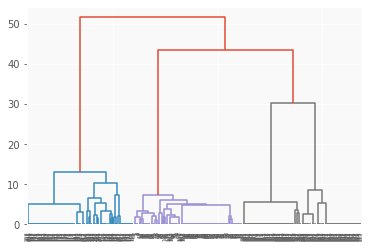

In [77]:
dn=dendrogram(link)

Построим график каменистая осыпь. По точке излома определим оптимальное число кластеров - 4

Text(0, 0.5, 'Расстояние')

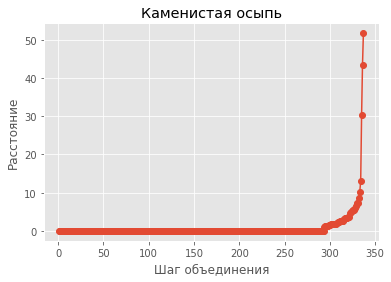

In [78]:
dist=link[:,2]
idx=range(1,len(dist)+1)
plt.title("Каменистая осыпь")
plt.plot(idx, dist, marker='o')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

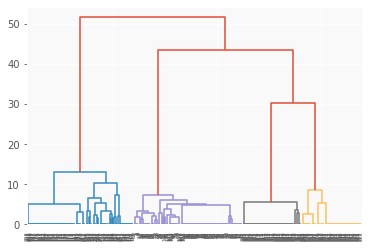

In [79]:
dn=dendrogram(link,color_threshold=14)

In [80]:
df['cluster'] = fcluster(link, 4, criterion='maxclust')

Выведем число элементов в каждом кластере, а также медианные и средние значения.

In [81]:
print(df['cluster'].value_counts())

2    110
1    108
4     61
3     59
Name: cluster, dtype: int64


In [82]:
df.groupby('cluster').mean()

V1    V2    V3    V4    V5    V6    V7    V8    V9   V10   V11
cluster                                                                  
1        2.82  2.83  2.77  2.62  2.61  2.58  2.75  2.92  4.95  4.81  4.86
2        4.85  4.80  4.84  4.68  3.04  3.04  3.00  2.99  3.07  3.05  3.05
3        3.00  2.97  2.97  2.92  2.92  2.95  4.92  4.92  3.00  3.00  3.00
4        3.00  3.00  3.00  3.00  4.85  4.85  3.00  2.92  2.75  2.75  2.75

In [83]:
df.groupby('cluster').median()

V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11
cluster                                                       
1        3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  5.0  5.0  5.0
2        5.0  5.0  5.0  5.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0
3        3.0  3.0  3.0  3.0  3.0  3.0  5.0  5.0  3.0  3.0  3.0
4        3.0  3.0  3.0  3.0  5.0  5.0  3.0  3.0  3.0  3.0  3.0

### Анализ и интерпретация результатов
Перед тем, как приступать непосредственно к анализу данных, можно попробовать сгруппировать вопросы с близкой семантикой.
Так, первые четыре вопроса касаются свежести дыхания и полости рта, следующие два - вкусовых качеств, 7 и 8 - концентрации
или отвлечения внимания, а последние три - использования леденцов в лечебных целях.
Это же разбиение можно проследить и в данных. Рассмотрим медианные значения по ответам для получившихся кластеров.
К первому кластеру отнесены те респонденты, которые поставили наивысшую оценку "медицинским" вопросам.
Во втором кластере оказались те участники, которые используют леденцы для освежения дыхания и полости рта.
Те голосовавшие, которые оказались в третьем кластере, предпочитают использовать леденцы для того, чтобы отвлечь/сфокусировать свое внимание.
И наконец последний кластер объединяет тех людей, для которых главное в леденцах - вкусовая составляющая.

Отметим также, что, согласно кластеризации, респонденты в среднем выделяют наиболее важные для них пункты "пятеркой", а
все остальные - "тройкой". При этом участники, отнесенные к первому ("медицинскому") кластеру, наиболее категорично относятся
ко всем остальным пунктам, зачастую выставляя им "двойки".